# Problem Statement: The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and upskill programs for low performing agents.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_excel('Sales.xlsx',sheet_name=1)
data.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [ ]:
data.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [ ]:
data.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [ ]:
for i in data.columns:
  print(i)
  print(str((data[i].isnull().sum()/len(data[i]))*100)+'%')

CustID
0.0%
AgentBonus
0.0%
Age
5.951327433628319%
CustTenure
5.0%
Channel
0.0%
Occupation
0.0%
EducationField
0.0%
Gender
0.0%
ExistingProdType
0.0%
Designation
0.0%
NumberOfPolicy
0.995575221238938%
MaritalStatus
0.0%
MonthlyIncome
5.221238938053097%
Complaint
0.0%
ExistingPolicyTenure
4.070796460176991%
SumAssured
3.4070796460176993%
Zone
0.0%
PaymentMethod
0.0%
LastMonthCalls
0.0%
CustCareScore
1.1504424778761062%


Observation: As the null values are less then 5% we can drop them,

## Pandas Profiling/EDA

In [ ]:
# pip install pandas-profiling==2.7.1

In [ ]:
# profile = pp.ProfileReportdata)
# profile.to_file("/content/drive/MyDrive/Great Learnings Business Analyst/CAPSTONE project/All projects/LI_BFSI_01 - Life Insurance Sales/insurance.html")  (

#Assigning continous and Categorical variables

In [ ]:
con=['AgentBonus','Age','MonthlyIncome','SumAssured']
cat=['CustTenure','Channel','Occupation','EducationField','Gender','ExistingProdType','Designation','NumberOfPolicy','MaritalStatus','Complaint','ExistingPolicyTenure','Zone','PaymentMethod','LastMonthCalls','CustCareScore']

In [ ]:
# checking the unique values in each categorical variables
for i in data[cat]:
  print(i)
  print(data[i].unique())
  print('\n')

CustTenure
[ 4.  2. nan 23. 11.  3.  7. 27. 22. 17.  5. 21. 18. 25. 14.  8. 15. 31.
  9. 26. 16. 10.  6. 20. 24. 30. 12. 38. 29. 39. 28. 19. 13. 43. 36. 40.
 44. 32. 46. 34. 35. 33. 41. 52. 37. 42. 45. 49. 57. 48. 53. 47. 55. 51.
 50.]


Channel
['Agent' 'Third Party Partner' 'Online']


Occupation
['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business']


EducationField
['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA']


Gender
['Female' 'Male' 'Fe male']


ExistingProdType
[3 4 2 5 1 6]


Designation
['Manager' 'Exe' 'Executive' 'VP' 'AVP' 'Senior Manager']


NumberOfPolicy
[ 2.  4.  3.  5. nan  1.  6.]


MaritalStatus
['Single' 'Divorced' 'Unmarried' 'Married']


Complaint
[1 0]


ExistingPolicyTenure
[ 2.  3.  4.  1.  5.  6. 16. 13.  7. nan  8.  9. 12. 15. 10. 23. 11. 14.
 17. 18. 21. 22. 19. 20. 25.]


Zone
['North' 'West' 'East' 'South']


PaymentMethod
['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']


LastMonthCalls
[ 5  7  0  2

### Observation:
The below mentioned features needs to be cleaned before using
1. Designation
2. Occupation
3. Educational Field
4. Gender
5. Marital Status

In [ ]:
data['Occupation']=np.where(data.Occupation=='Laarge Business','Large Business',data.Occupation)
data['EducationField']=np.where(data.EducationField=='UG','Under Graduate',data.EducationField)
data['Designation']=np.where(data.Designation=='Exe','Executive',data.Designation)
data['Gender']=np.where(data.Gender=='Fe male','Female',data.Gender)
data['MaritalStatus']=np.where(data.MaritalStatus=='Unmarried','Single',data.MaritalStatus)

### Cleaning the Continous variables



In [ ]:
for i in data[con]:
  print(i)
  for j in range(len(data)):
    try:
      data[i][j]=float(data[i][j])
    except:
      data[i][j]=np.nan

AgentBonus
Age
MonthlyIncome
SumAssured


### Univariate Analysis

No handles with labels found to put in legend.


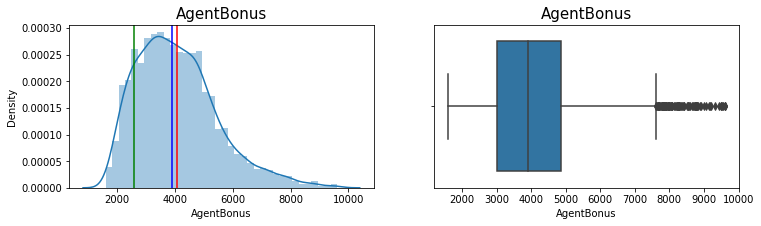

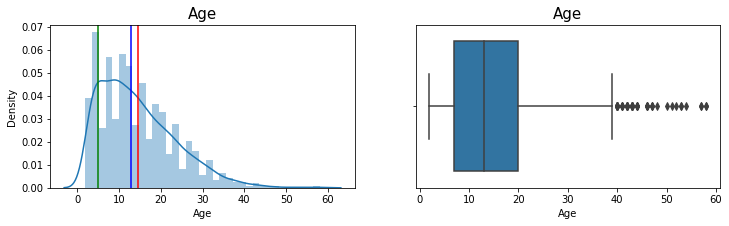

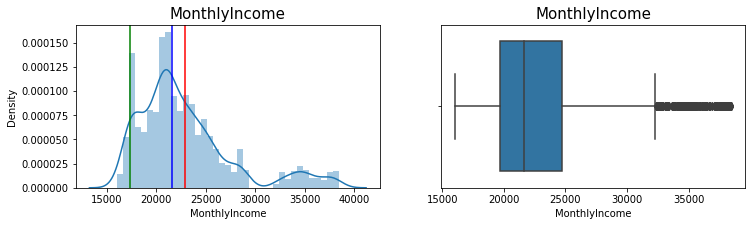

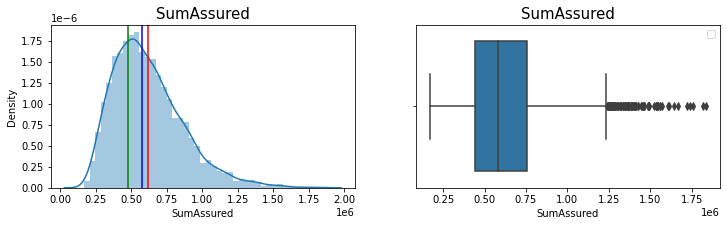

In [ ]:
#Histogram for continous variables
def plot(data,col):
  for i in col:
    mean=data[i].mean()
    median=data[i].median()
    mode=data[i].mode()[0]

    fig,axes=plt.subplots(nrows=18,ncols=2)
    fig.set_size_inches(12,3)
    plt.subplot(1,2,1)
    p=sns.distplot(data[i])
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='blue',label='Median')
    plt.axvline(mode,color='green',label='Mode')
    p.set_title(i,fontsize=15)
    plt.subplot(1,2,2)
    p=sns.boxplot(data[i],orient='v')
    p.set_title(i,fontsize=15)

  plt.legend()
  plt.show()
plot(data,con)

### Observation: There are outliers present in the continous variables which will reduced the effectiveness of Regression prediction, so we are going to treat the outliers

* Agent Bonus: Agent bonus is continous variable which contains the bonus given to the agent basen on their performance, we can observe that the distribution of the data is almost normal but skewed towards the right, Which is proven by the boxplot that there are outliers in the extreme right.


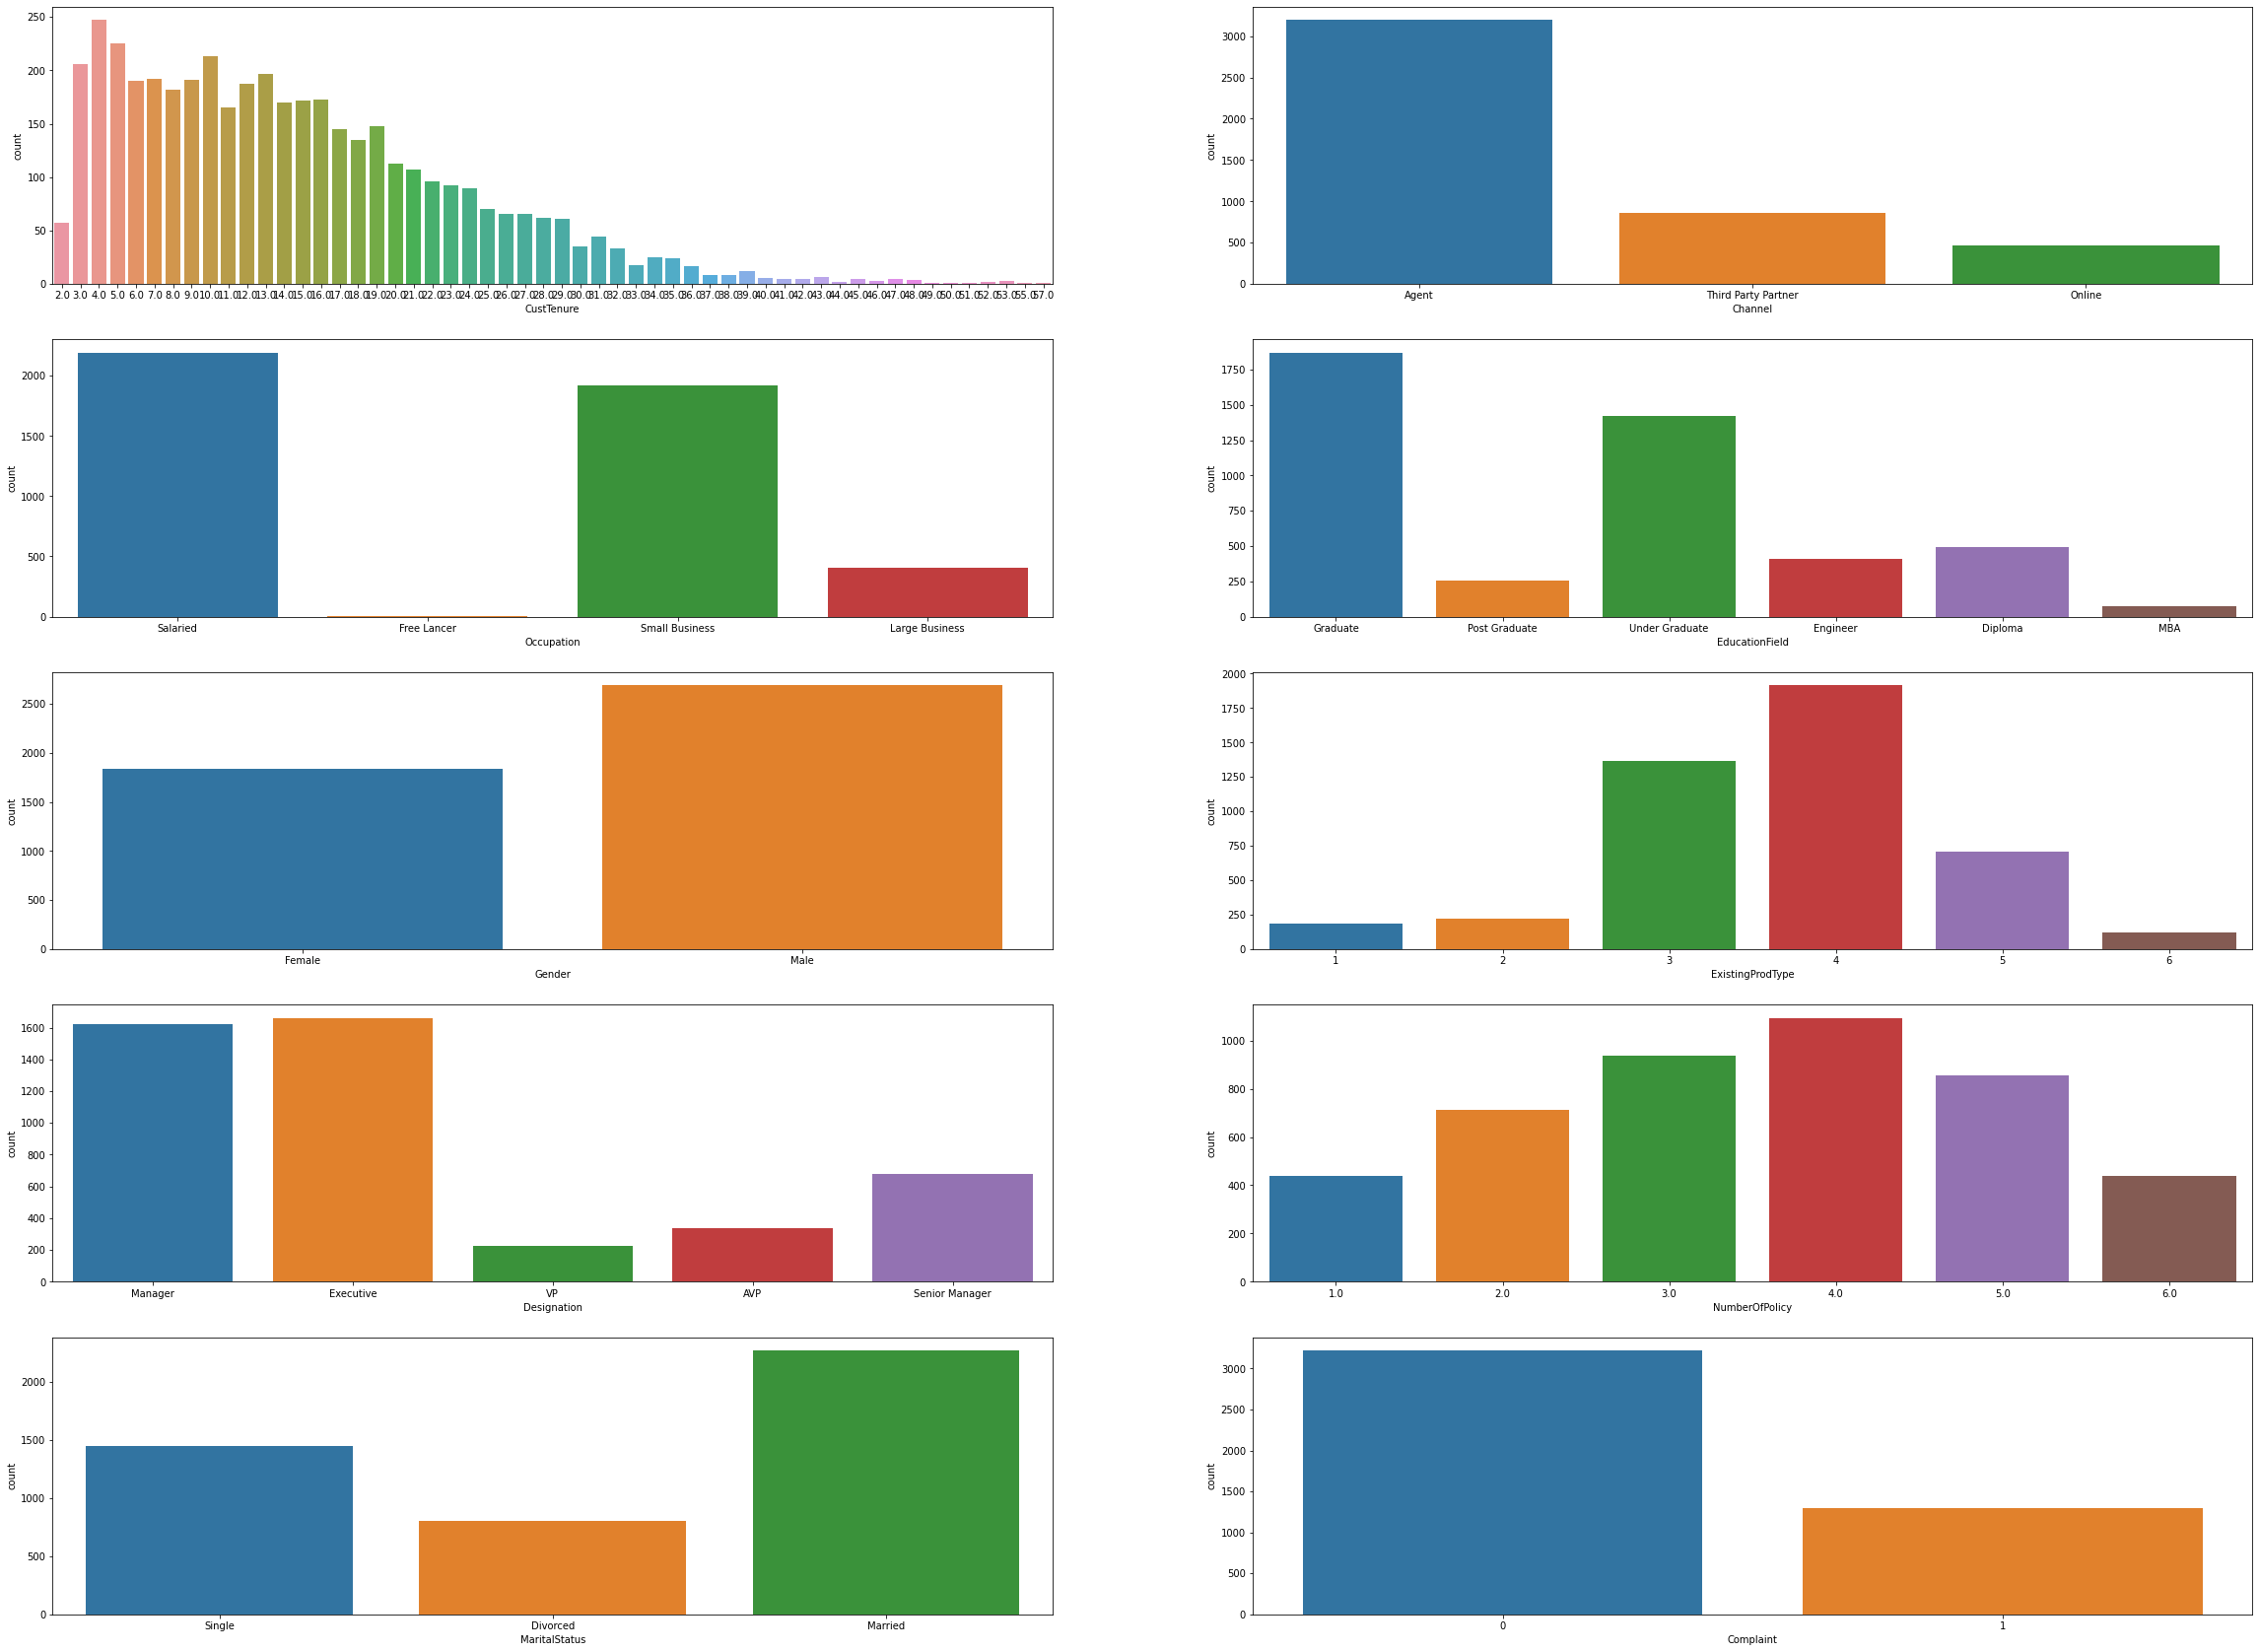

In [ ]:
## Count plots for categorical variables
ctr=0
fig, axes=plt.subplots(5,2,figsize=(40,30))
for i in range(5):
  for j in range(2):
    sns.countplot(data[cat[ctr]],ax=axes[i][j])
    ctr+=1
plt.show()

### Observation:
* 'Freelancer' Level in the variable occupation is empty, we have to further investigate
* South region in the variable Zone is empty we need to check

In [ ]:
#Occupation
data.Occupation.value_counts(normalize=True)

Salaried          0.484956
Small Business    0.424336
Large Business    0.090265
Free Lancer       0.000442
Name: Occupation, dtype: float64

In [ ]:
#zone
data.Zone.value_counts(normalize=True)

West     0.567699
North    0.416814
East     0.014159
South    0.001327
Name: Zone, dtype: float64

###Observation: Number of records for freelancers and south zone is less than 1%.

## Bivariate Analysis

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

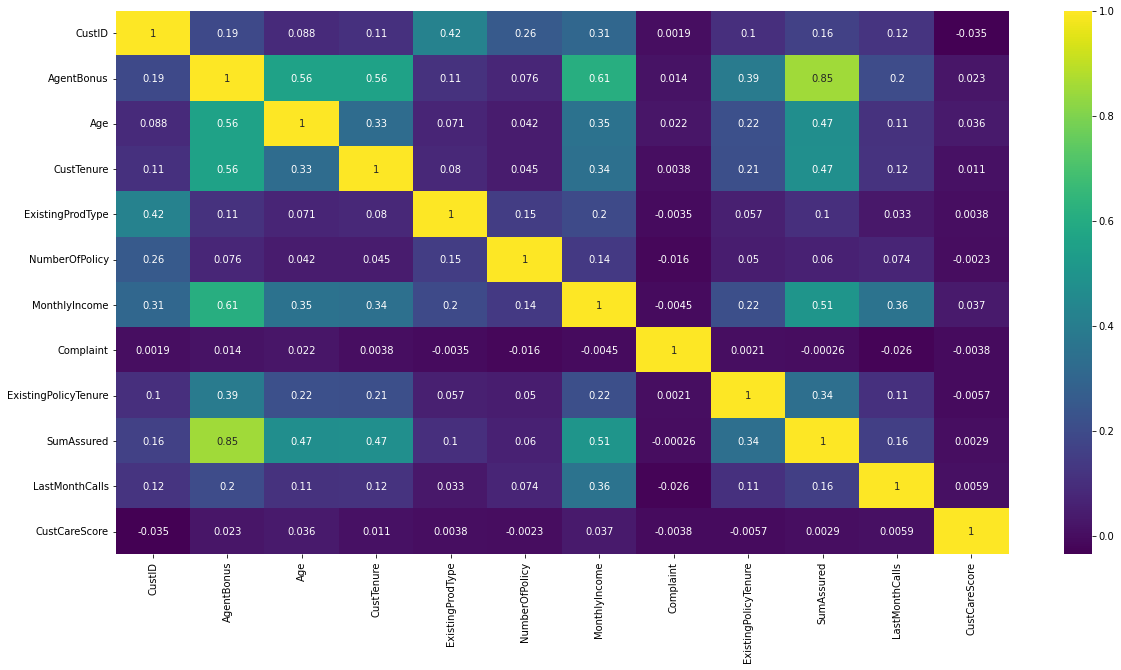

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

### Heat Map Observation:
For Linear Regression the should be collinearity between the dependent and independent variable, but there should not be collinearity within the independent variables, as it will reduce the effectiveness of the regression model.

* Target variable Agent Bonus
  * There is moderate the High positive correlation with independent variables like SumAssured, Monthly income, Age, CustTenure, Existing Policytenure.
* Independent variables:
  * Sumassured, Monthly income, Age and custtenure are Correlated which will reduce the accuracy of the prediction.

#Dropping the Nullvalues from the dataset

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [ ]:
## Outlier Treatment, we are going to cap the outliers to upper limit and lower limit of boxplot
for i in data[con]:
  if i !='AgentBonus':
    print(i)
    q1=np.quantile(data[i],.25)
    q3=np.quantile(data[i],.75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    data[i]=np.where(data[i]>ul,ul,data[i])
    data[i]=np.where(data[i]<ll,ll,data[i])

Age
MonthlyIncome
SumAssured


In [ ]:
# Droping the variable not required for further process
data.drop('CustID',axis=1,inplace=True)

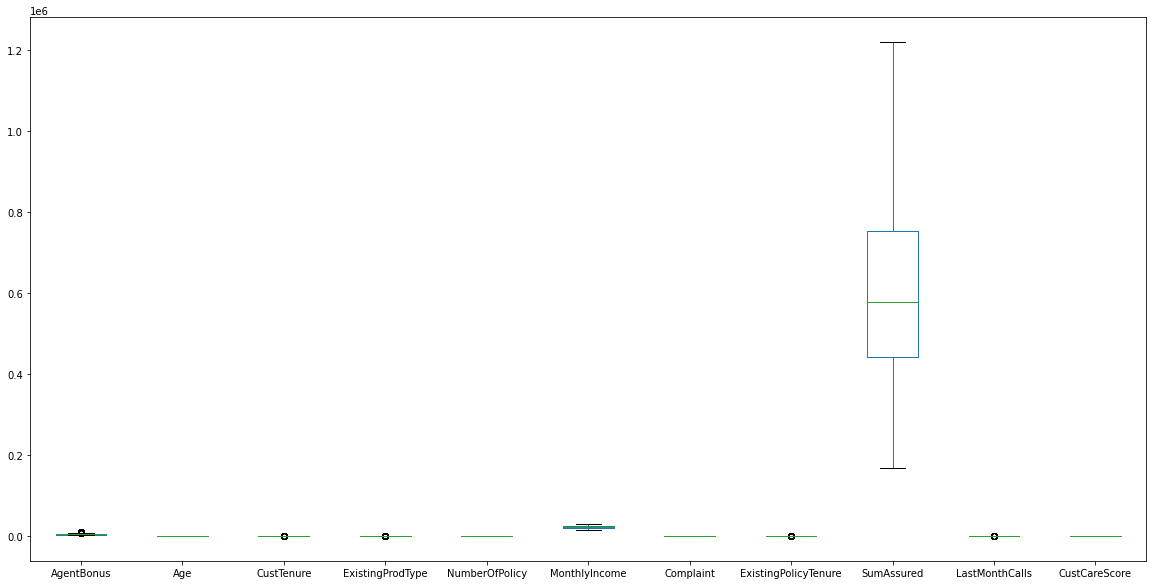

In [ ]:
data.plot(kind='box',figsize=(20,10))
plt.show()

### Outlier Treatment Observation:

All the Outliers in continous variables have been treated and we can observe that from the above box plot. The variables that have outliers in the above plot are not continous hence we can proceed with Regression

# Encoding the data

In [ ]:
data.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.00,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.00,0,3.0,294502.0,North,Yearly,7,3.0
6,3850,12.0,23.0,Agent,Salaried,Graduate,Male,4,VP,3.0,Divorced,30969.75,0,2.0,392689.0,North,Yearly,9,2.0
7,2073,6.0,4.0,Agent,Small Business,Under Graduate,Female,3,Executive,4.0,Single,17279.00,0,2.0,369079.0,West,Half Yearly,3,3.0
8,2719,8.0,11.0,Agent,Salaried,Graduate,Male,4,Manager,3.0,Divorced,20916.00,1,1.0,405143.0,West,Yearly,1,4.0


In [ ]:
# using Pandas to create the dummies
for i in cat:
  data[i]=pd.Categorical(data[i]).codes

In [ ]:
data.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,2,0,2,2,0,2,2,1,2,20993.00,1,1,806761.0,1,0,5,1
1,2214,11.0,0,2,2,2,1,3,2,3,0,20130.00,0,2,294502.0,1,3,7,2
6,3850,12.0,21,0,2,2,1,3,4,2,0,30969.75,0,1,392689.0,1,3,9,1
7,2073,6.0,2,0,3,5,0,2,1,3,2,17279.00,0,1,369079.0,3,0,3,2
8,2719,8.0,9,0,2,2,1,3,2,2,0,20916.00,1,0,405143.0,3,3,1,3


In [ ]:
#Splitting the train and test data
x=data.drop('AgentBonus',axis=1)
y=data.AgentBonus
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
len(xtrain),len(xtest),len(ytrain),len(ytest)

(2412, 1035, 2412, 1035)

In [ ]:
#Scaling the data as all the columns have a different scale
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
#Scaling and transforming the train set
xtrain_s=sd.fit_transform(xtrain)
#Only performing transformation in test set so the data only centers as per the zscale of train set
xtest_s=sd.transform(xtest)

#Linear Regression from Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(xtrain_s,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([189.68437805, 189.93997883,  -2.06049012,   4.5738666 ,
        17.43190254, -11.12925652, -27.43211995, -19.76398315,
        -9.3341945 ,  -3.27497112, 259.47070685,  -3.18757777,
       117.4219888 , 796.61949938,   3.32318704,  -5.46515996,
       -28.52024443,  -2.10854504])

In [ ]:
for idx,col in enumerate(x.columns):
  print('The coefficient for {} is {}'.format(col,lr.coef_[idx]))

The coefficient for Age is 189.6843780485947
The coefficient for CustTenure is 189.93997883053066
The coefficient for Channel is -2.0604901180319213
The coefficient for Occupation is 4.5738666043800205
The coefficient for EducationField is 17.43190254390647
The coefficient for Gender is -11.12925651832215
The coefficient for ExistingProdType is -27.43211995029537
The coefficient for Designation is -19.763983152303318
The coefficient for NumberOfPolicy is -9.334194504441923
The coefficient for MaritalStatus is -3.2749711168704927
The coefficient for MonthlyIncome is 259.47070684826843
The coefficient for Complaint is -3.1875777723294094
The coefficient for ExistingPolicyTenure is 117.42198879844568
The coefficient for SumAssured is 796.6194993843865
The coefficient for Zone is 3.3231870361572486
The coefficient for PaymentMethod is -5.465159964280764
The coefficient for LastMonthCalls is -28.520244427106753
The coefficient for CustCareScore is -2.108545036842056


## linear Regression Coefficients
* Highest Coefficient is for SumAssured - 796

In [ ]:
#Intercept
intercept=lr.intercept_
print('The coefficient for intercept is '+str(intercept))

The coefficient for intercept is 4090.1044776119406


In [ ]:
#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(lr.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(lr.score(xtest_s,ytest)))

The score of the Linear Regression in Train dataset is 0.788323997633531
The score of the Linear Regression in Test dataset is 0.7843887689784937


### Observation: From the above Accuracy scores our model performs well in both train and test set with ~78% accuracy

In [ ]:
from sklearn import metrics

In [ ]:
#RMSE on Train and test set
p_train=lr.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=lr.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

Root mean square of Train set is 604.2025733695676
Root mean square of Test set is 612.0316562490927


In [ ]:
#MAE on Train and Test set
print('Mean Absolute Error on Train set is '+str(metrics.mean_absolute_error(ytrain,p_train)))
print('Mean Absolute Error on Test set is '+str(metrics.mean_absolute_error(ytest,p_test)))

Mean Absolute Error on Train set is 477.5108611059803
Mean Absolute Error on Test set is 485.9844482487161


#Using Ridge and Lasso Techniques to optimize the model further

In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
ridge=Ridge()
ridge.fit(xtrain_s,ytrain)
print('Ridge Model Coefficients ',ridge.coef_)

Ridge Model Coefficients  [189.75356761 190.00970248  -2.06672534   4.55984886  17.4343483
 -11.12658938 -27.36104187 -19.68810836  -9.31995089  -3.27934621
 259.42875435  -3.18194218 117.47594294 796.20094581   3.32082244
  -5.50147903 -28.4791259   -2.11002364]


In [ ]:
for idx,i in enumerate(x.columns):
  # print(idx,i)
  print(i,'-------------------->',str(ridge.coef_[idx]))

Age --------------------> 189.75356760959744
CustTenure --------------------> 190.0097024829344
Channel --------------------> -2.0667253400815646
Occupation --------------------> 4.559848856444626
EducationField --------------------> 17.43434830355062
Gender --------------------> -11.126589379731175
ExistingProdType --------------------> -27.361041874048105
Designation --------------------> -19.68810835814028
NumberOfPolicy --------------------> -9.319950886170451
MaritalStatus --------------------> -3.27934620932055
MonthlyIncome --------------------> 259.42875435025985
Complaint --------------------> -3.181942182171821
ExistingPolicyTenure --------------------> 117.47594293685255
SumAssured --------------------> 796.2009458145926
Zone --------------------> 3.3208224421671115
PaymentMethod --------------------> -5.501479031677524
LastMonthCalls --------------------> -28.47912589887939
CustCareScore --------------------> -2.1100236370977514


In [ ]:
#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(ridge.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(ridge.score(xtest_s,ytest)))

The score of the Linear Regression in Train dataset is 0.7883239216656678
The score of the Linear Regression in Test dataset is 0.7844104369458885


In [ ]:
#RMSE on Train and test set
p_train=ridge.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=ridge.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

Root mean square of Train set is 604.2026817899218
Root mean square of Test set is 612.0009022500872


### Lasso

In [ ]:
lasso=Lasso()
lasso.fit(xtrain_s,ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
for idx,i in enumerate(x.columns):
  print(i,'-------------------->',str(lasso.coef_[idx]))

Age --------------------> 189.04558900036614
CustTenure --------------------> 189.48937179696438
Channel --------------------> -1.183244162062501
Occupation --------------------> 3.961921858769767
EducationField --------------------> 16.768152040655362
Gender --------------------> -9.99385613331242
ExistingProdType --------------------> -26.122367990426188
Designation --------------------> -17.707639291062215
NumberOfPolicy --------------------> -8.028138856825706
MaritalStatus --------------------> -2.2998955518570594
MonthlyIncome --------------------> 257.1370351535856
Complaint --------------------> -1.9636379550106249
ExistingPolicyTenure --------------------> 116.7210254031537
SumAssured --------------------> 796.6119181329736
Zone --------------------> 2.133795664888373
PaymentMethod --------------------> -5.026862668643853
LastMonthCalls --------------------> -27.10695209737829
CustCareScore --------------------> -1.0670428861311012


In [ ]:
#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(lasso.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(lasso.score(xtest_s,ytest)))

The score of the Linear Regression in Train dataset is 0.7883133549031465
The score of the Linear Regression in Test dataset is 0.7846773397075404


In [ ]:
#RMSE on Train and test set
p_train=lasso.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=lasso.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

Root mean square of Train set is 604.217762347508
Root mean square of Test set is 611.6219522775372


### Observation:
As Lasso reduces the weights of unnecessary dimensions to 0 the Root Mean square of test is lesser for Lasso compared to other models

## Assumptions in Linear Regression

#### Testing the Assumptions of Linear regression

The Five assumptions of linear regression are
1. Linear Relationship between the variables
2. Homoscedasticity (variance is constant)
3. Absence of Multicollinearity (There is no multicollinearity between the independent variables)
4. Absence of Auto-Correlation 
5. Normal Distribution of Errors

###1. Linear Relationship
From the above pairplot in bivariate analysis we could observe that most of the continous variables have a linear relationship

###2. Homoscedasticity

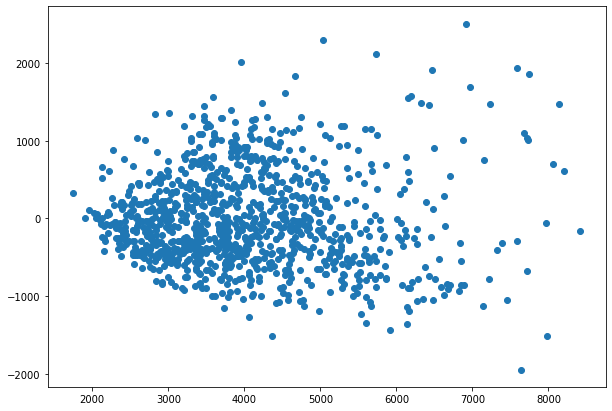

In [ ]:
resid=ytest-p_test
fig,ax=plt.subplots(figsize=(10,7))
p=ax.scatter(p_test,resid)

### Homoscedasticity Observation: From the above scatter plot we can observe that variance increase across the X axis.

###3.Multicollinearity (Checking using Variance inflation Factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=x.columns

vif['value']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif.sort_values(by='value',ascending=False)

,Feature,value
10,MonthlyIncome,50.266142
3,Occupation,16.030344
13,SumAssured,14.309812
6,ExistingProdType,12.736254
7,Designation,7.442355
14,Zone,5.148586
0,Age,4.934044
8,NumberOfPolicy,4.527285
4,EducationField,4.360097
1,CustTenure,3.911201


#### Multicolinearity Observation:
The Features Monthly income, Ocupation, SumAssured, ExistingProdType, Designation are showing High collinearity

###4. No Auto Correlation

[]

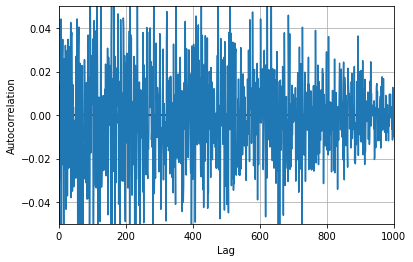

In [ ]:
s=pd.plotting.autocorrelation_plot(resid)
s.set_xlim([0,1000])
s.set_ylim([-0.05,0.05])
s.plot()

#### Observation:
From the above plot we can observe that the Residuals exceed the cutoff value (0.02) which proves there is autocorrelation.

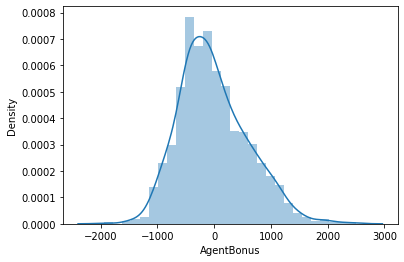

In [ ]:
###5.Normality of the Errors

sns.distplot(resid)

### Normality Observation:
From the above histogram of the residual we can observe a normal curve

In [ ]:
## KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(n_neighbors=int(np.sqrt(len(xtrain_s))))
knn.fit(xtrain_s,ytrain)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                    weights='uniform')

In [ ]:
#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(knn.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(knn.score(xtest_s,ytest)))

#RMSE on Train and test set
p_train=knn.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=knn.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

The score of the Linear Regression in Train dataset is 0.6338821078006578
The score of the Linear Regression in Test dataset is 0.6419137819259342
Root mean square of Train set is 794.6158706430099
Root mean square of Test set is 788.7366098332138


### KNN Observation:
From the above plot we can observe that KNN Regressor have 63% accuracy in Train and 64% Accuracy in Test. The Accuracy values of Train and test set is stable within 10% range which shows the model is stable and not overfitted

In [ ]:
## Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(xtrain_s,ytrain)

#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(dt.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(dt.score(xtest_s,ytest)))

#RMSE on Train and test set
p_train=dt.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=dt.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

The score of the Linear Regression in Train dataset is 1.0
The score of the Linear Regression in Test dataset is 0.7297073848936944
Root mean square of Train set is 0.0
Root mean square of Test set is 673.8987244543916


### Decision Tree Regressor Observation:
From the above metrics for Decision tree we can observe that While training Decision Tree is overfitted with 100% score in Train and only 70% score in test

In [ ]:
### RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(xtrain_s,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(rd.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(rd.score(xtest_s,ytest)))

#RMSE on Train and test set
p_train=rd.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=rd.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

The score of the Linear Regression in Train dataset is 0.9786933101884246
The score of the Linear Regression in Test dataset is 0.8563570761662513
Root mean square of Train set is 191.1250265427802
Root mean square of Test set is 506.3510326864247


### Random Forest Regression Observation:
From the above metrics we can observe that the score of Randomforest regressor in train is 98% and test is 86% which is slightly overfitted

In [ ]:
### Gradient Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(xtrain_s,ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(gbr.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(gbr.score(xtest_s,ytest)))

#RMSE on Train and test set
p_train=gbr.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=gbr.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

The score of the Linear Regression in Train dataset is 0.8747611080889244
The score of the Linear Regression in Test dataset is 0.8464825075980426
Root mean square of Train set is 464.7467552963549
Root mean square of Test set is 516.6120479205487


### Gradient Boosting Regressor:
From the above metrics we observe that the score of Gradient boosting in train and test is good with 87% in Train set and 84% in test set.

In [ ]:
### Adaptive Boosting Regressor
from sklearn.ensemble import AdaBoostRegressor

adr=AdaBoostRegressor()
adr.fit(xtrain_s,ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(adr.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(adr.score(xtest_s,ytest)))

#RMSE on Train and test set
p_train=adr.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=adr.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

The score of the Linear Regression in Train dataset is 0.7707718940644421
The score of the Linear Regression in Test dataset is 0.7597676384353496
Root mean square of Train set is 624.3330652971148
Root mean square of Test set is 640.3545544844981


In [ ]:
### XGBoost Regressor
from xgboost import XGBRegressor

xgr=XGBRegressor()
xgr.fit(xtrain_s,ytrain)

[05:07:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#Train and Test Scores
print('The score of the Linear Regression in Train dataset is '+str(xgr.score(xtrain_s,ytrain)))
print('The score of the Linear Regression in Test dataset is '+str(xgr.score(xtest_s,ytest)))

#RMSE on Train and test set
p_train=xgr.fit(xtrain_s,ytrain).predict(xtrain_s)
print('Root mean square of Train set is '+str(np.sqrt(metrics.mean_squared_error(ytrain,p_train))))

#Test set
p_test=xgr.fit(xtrain_s,ytrain).predict(xtest_s)
print('Root mean square of Test set is '+str(np.sqrt(metrics.mean_squared_error(ytest,p_test))))

The score of the Linear Regression in Train dataset is 0.8714025173564662
The score of the Linear Regression in Test dataset is 0.8474740415213979
[05:07:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root mean square of Train set is 470.9371939186245
[05:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root mean square of Test set is 514.7662647629797


### conclusion:
From all the above regression Models used XG Boost Regressor gives the best metrics,

In [ ]:
xgr.feature_importances_

array([0.07257603, 0.05309073, 0.00393796, 0.        , 0.00611325,
       0.00277912, 0.00610439, 0.01494219, 0.00494876, 0.00469225,
       0.17760845, 0.        , 0.02653597, 0.59831256, 0.00553463,
       0.0061638 , 0.00986193, 0.00679802], dtype=float32)

In [ ]:
x.columns

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'Zone', 'PaymentMethod', 'LastMonthCalls',
       'CustCareScore'],
      dtype='object')

In [ ]:
Features=x.columns
featureimp=xgr.feature_importances_
xgr_Feature_importance=pd.DataFrame(Features,featureimp)
xgr_Feature_importance.reset_index(inplace=True)
xgr_Feature_importance.columns=['Values','Features']
xgr_Feature_importance[['Features','Values']].sort_values(by='Values',ascending=False)

,Features,Values
13,SumAssured,0.598313
10,MonthlyIncome,0.177608
0,Age,0.072576
1,CustTenure,0.053091
12,ExistingPolicyTenure,0.026536
7,Designation,0.014942
16,LastMonthCalls,0.009862
17,CustCareScore,0.006798
15,PaymentMethod,0.006164
4,EducationField,0.006113


### Observation:
The variable SumAssured contributed 60% in predicting the Agent bonus and we can understand that AgentBonus is based on employees performance in Assuring the sum from customer.
The variable Monthly Income of an employee contributes 18% in predicting the Agent Bonus.
The variable Age contributes 7% in predicting the Agent Bonus.